# Question 4

Microsoft called us for help. They built a studio and would like to start producing movies. They're asking what the best films are and how they can make great films. Using provided data, we will give our best recommendations. 

# Can we find directors with a track record of directing well-rated films?

### First, let's import the data

In [3]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls

CONTRIBUTING.md
LICENSE.md
Project Cleaning Rotten Tomatoes Only.ipynb
Project Cleaning.ipynb
Question 2 .ipynb
Question 3.ipynb
Question 4.ipynb
Question One.ipynb
README.md
awesome.gif
data
project_pdf_submission.gif
repo_pdf.gif
video_recording_submission.gif
zippedData


In [5]:
cd\zippedData

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData


In [6]:
cd\unzipped

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData/unzipped


### Let's take a look at the data. 

In [7]:
more_crew = pd.read_csv('imdb.title.principals.csv')
more_crew.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [8]:
crew_df = pd.read_csv('imdb.title.crew.csv')
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### We have two dataframes with crew members. 

In [9]:
film_employees = pd.read_csv('imdb.name.basics.csv')
film_employees = film_employees.loc[:, ['nconst', 'primary_name', 'primary_profession', 'known_for_titles']]

In [10]:
title_ratings = pd.read_csv('imdb.title.ratings.csv')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### We can shape our dataframes with the titles to be a key for the tvalues. 

In [116]:
title_info = pd.read_csv('imdb.title.basics.csv')
title_info_small = title_info.loc[:,['tconst', 'original_title']]

In [117]:
title_df = pd.read_csv('imdb.title.akas.csv')

In [118]:
valid_title_df = title_df[title_df['is_original_title'] == 1]

In [119]:
valid_title_only = valid_title_df.loc[:,['title_id','title']]

In [120]:
valid_title_only.replace({'title_id' : 'tconst'}, inplace = True)

In [121]:
valid_title_only.set_index('title_id', inplace = True)

In [122]:
valid_title_only.head()

,title
title_id,
tt0369610,Jurassic World
tt0401729,John Carter
tt10010134,Versailles Rediscovered - The Sun King's Vanis...
tt10027708,Miguelito - Canto a Borinquen
tt10050722,Thing I Don't Get


In [123]:
title_info_small.set_index('tconst', inplace = True)

### Here, we concatenate them to create a master key of tvalues. 

In [124]:
to_concat = [title_info_small, valid_title_only]
t_title = pd.concat(to_concat, sort = True)

### Now, we will replace the empty cells with missing movie titles. 

In [126]:
t_title['title_name'] = np.where(t_title['original_title'].isnull(), t_title['title'], t_title['original_title'])

In [127]:
t_title = t_title.loc[:,['title_name']]

In [22]:
t_title.reset_index(inplace = True)

### Let's check for null values and remove them from the data. 

In [128]:
t_title.isna().sum()

title_name    21
dtype: int64

In [129]:
t_title.dropna(inplace = True)

In [25]:
t_title.set_index('index', inplace = True)

In [26]:
title_ratings.set_index('tconst', inplace = True)

### Now we will add ratings to our title dataframe. 

In [130]:
to_con = [t_title, title_ratings]
title_ratings_votes = pd.concat(to_con, sort = True)

In [28]:
title_ratings_votes.head()

,averagerating,numvotes,title_name
tt0063540,NaN,NaN,Sunghursh
tt0066787,NaN,NaN,Ashad Ka Ek Din
tt0069049,NaN,NaN,The Other Side of the Wind
tt0069204,NaN,NaN,Sabse Bada Sukh
tt0100275,NaN,NaN,La Telenovela Errante


In [29]:
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### In order to evaluate the directors individually, we will split them apart into their own cells.

In [30]:
split_directors = crew_df['directors'].str.split(',', expand = True)

In [31]:
split_directors['tconst'] = crew_df['tconst']

In [32]:
vertical_directors = split_directors.melt(id_vars = ['tconst'], value_name = 'nconst')

In [33]:
split_writers = crew_df['writers'].str.split(',', expand = True)

In [34]:
split_writers['tconst'] = crew_df['tconst']

In [35]:
vertical_writers = split_writers.melt(id_vars = ['tconst'], value_name = 'nconst')

In [36]:
vertical_directors.head()

,tconst,variable,nconst
0,tt0285252,0,nm0899854
1,tt0438973,0,NaN
2,tt0462036,0,nm1940585
3,tt0835418,0,nm0151540
4,tt0878654,0,nm0089502


In [37]:
vertical_writers.head()

,tconst,variable,nconst
0,tt0285252,0,nm0899854
1,tt0438973,0,nm0175726
2,tt0462036,0,nm1940585
3,tt0835418,0,nm0310087
4,tt0878654,0,nm0284943


In [38]:
vertical_writers['variable'] = 'writers'

In [39]:
vertical_directors['variable'] = 'directors'

In [40]:
add_crew = more_crew.loc[:, ['tconst','nconst','category']]

In [41]:
add_crew.set_index('tconst', inplace = True)

### Now we can concatenate these dataframes together.

In [42]:
for_concat = (vertical_directors, vertical_writers)
vertical_crew = pd.concat(for_concat, sort = True)

In [43]:
vertical_crew.set_index('tconst', inplace = True)

In [44]:
vertical_crew.rename(columns = {'variable' : 'category'}, inplace = True)

In [45]:
pls_concat = (vertical_crew, add_crew)
full_crew = pd.concat(pls_concat, sort= True)

In [46]:
full_crew.head()

,category,nconst
tconst,,
tt0285252,directors,nm0899854
tt0438973,directors,NaN
tt0462036,directors,nm1940585
tt0835418,directors,nm0151540
tt0878654,directors,nm0089502


In [47]:
rating_and_crew = title_ratings_votes.join(full_crew, how = 'inner')

In [48]:
rating_and_crew.drop_duplicates(inplace = True)

In [49]:
rating_and_crew.head()

,averagerating,numvotes,title_name,category,nconst
tt0063540,NaN,NaN,Sunghursh,directors,nm0712540
tt0063540,NaN,NaN,Sunghursh,directors,None
tt0063540,NaN,NaN,Sunghursh,writers,nm0023551
tt0063540,NaN,NaN,Sunghursh,writers,nm1194313
tt0063540,NaN,NaN,Sunghursh,writers,nm0347899


### Let's get rid of the NaN values from the nconst and average rating columns since we wont be able to evaluate the data without those. 

In [50]:
rating_and_crew.dropna(subset=['averagerating', 'nconst'], inplace = True)

In [51]:
rating_and_crew.head()

,averagerating,numvotes,title_name,category,nconst
tt0063540,7.0,77.0,NaN,directors,nm0712540
tt0063540,7.0,77.0,NaN,writers,nm0023551
tt0063540,7.0,77.0,NaN,writers,nm1194313
tt0063540,7.0,77.0,NaN,writers,nm0347899
tt0063540,7.0,77.0,NaN,writers,nm1391276


In [52]:
rating_and_crew.drop_duplicates(inplace = True)

### Now, we're only going to evaluate the records of films that have more than 30 votes. 

In [53]:
rating_and_crew = rating_and_crew[rating_and_crew['numvotes'] >= 30]

### We will calculate how many films they have directed.

In [54]:
directors_only = rating_and_crew[rating_and_crew['category'] == 'directors']

In [55]:
n_count_d = directors_only.groupby('nconst').nconst.count()

In [56]:
n_count_d_for_join = n_count_d.to_frame(name ='nconst_count')

In [57]:
directors_only.set_index('nconst', inplace = True)

In [58]:
director_rating_count = directors_only.join(n_count_d, how = 'inner', lsuffix = 'x')

In [59]:
director_rating_count.rename(columns = {'nconst': 'ncount'}, inplace = True)

In [60]:
director_rating_count.head()

,averagerating,numvotes,title_name,category,ncount
nconst,,,,,
nm0000080,6.9,4517.0,NaN,directors,1
nm0000095,6.3,41608.0,NaN,directors,8
nm0000095,7.7,356500.0,NaN,directors,8
nm0000095,6.3,79381.0,NaN,directors,8
nm0000095,7.3,179453.0,NaN,directors,8


### Limit directors by number of films

Let's only evaluate directors with 5 or more movies.

In [61]:
director_five = director_rating_count[director_rating_count['ncount'] >= 5]

In [62]:
director_five.head()

,averagerating,numvotes,title_name,category,ncount
nconst,,,,,
nm0000095,6.3,41608.0,NaN,directors,8
nm0000095,7.7,356500.0,NaN,directors,8
nm0000095,6.3,79381.0,NaN,directors,8
nm0000095,7.3,179453.0,NaN,directors,8
nm0000095,6.6,59054.0,NaN,directors,8


In [64]:
director_ratings = director_five.groupby('nconst').averagerating.mean()

In [65]:
director_ratings

nconst
nm0000095    6.700000
nm0000108    6.350000
nm0000110    6.928571
nm0000142    6.714286
nm0000165    6.662500
               ...   
nm6576552    6.260000
nm6832369    6.860000
nm6901236    7.560000
nm6935209    4.687500
nm7379431    6.200000
Name: averagerating, Length: 972, dtype: float64

In [66]:
all_director_ratings = director_ratings.to_frame()

In [67]:
all_director_ratings.head()

,averagerating
nconst,
nm0000095,6.700000
nm0000108,6.350000
nm0000110,6.928571
nm0000142,6.714286
nm0000165,6.662500


In [68]:
all_director_ratings['averagerating'].sort_values( ascending = False)

nconst
nm0517665    8.637500
nm2833230    8.266667
nm4414980    8.260000
nm1355731    8.242857
nm2050348    8.242857
               ...   
nm2367198    2.112500
nm1448482    1.442857
nm3087956    1.400000
nm5292466    1.120000
nm4407114    1.080000
Name: averagerating, Length: 972, dtype: float64

### Let's also only look at directors who have an average rating of 8.1 or higher. 

In [69]:
best_directors = all_director_ratings[all_director_ratings['averagerating'] >= 8.1]

In [70]:
best_directors

,averagerating
nconst,
nm0517665,8.637500
nm1355731,8.242857
nm2050348,8.242857
nm2833230,8.266667
nm4254419,8.140000
nm4414980,8.260000


### Connecting the names to the directors.

In [89]:
film_employees = pd.read_csv('imdb.name.basics.csv')

In [90]:
film_employees.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [91]:
film_employees = film_employees.loc[:,['primary_name', 'nconst']]

In [92]:
film_employees.set_index('nconst', inplace = True)

In [93]:
film_employees.head()

,primary_name
nconst,
nm0061671,Mary Ellen Bauder
nm0061865,Joseph Bauer
nm0062070,Bruce Baum
nm0062195,Axel Baumann
nm0062798,Pete Baxter


In [108]:
directors_for_hire = best_directors.join(film_employees, how = 'inner', lsuffix = 'x')

### Finally, we can take a look at the top directors. 

In [133]:
directors_for_hire

,Average Film Rating,Directors
nconst,,
nm0517665,8.637500,Tom Logan
nm1355731,8.242857,Josh Lowell
nm2050348,8.242857,Peter Mortimer
nm2833230,8.266667,Nick Rosen
nm4254419,8.140000,Nabwana I.G.G.
nm4414980,8.260000,Aris Chatzistefanou


In [134]:
directors_for_hire.rename(columns={'primary_name' : 'Directors', 'averagerating':'Average Film Rating'}, inplace = True)

Text(0.5, 1.0, 'Top Directors with 5+ Films and Average Film Rating Over 8')

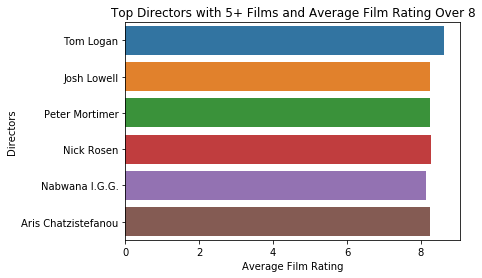

In [135]:
sns.barplot(y = 'Directors', x = 'Average Film Rating', data = directors_for_hire)

plt.title('Top Directors with 5+ Films and Average Film Rating Over 8')

# Conclusion

In conclusion, there are only a few directors who meet the specifications of having directed over 5 films and having an average film rating that is higher than 8.1. I would recommend that Microsoft hire one of these writers since they are experienced and competent. 